## Course: Social Network Analysis – Spring 2022 <br>
M.Sc. Program in Business Analytics <br>
Athens University of Economics and Business <br>
* Instructor: Katia Papakonstantinopoulou <br>
* Student: p2822103 / Alamanis Konstantinos


#### Data extraction and data cleaning

* Data was retreived from zipped file through command line and produced 5 csv per desired conference.
* Below a snapsot of the method, the same approach followed for each of the 5 conferences.

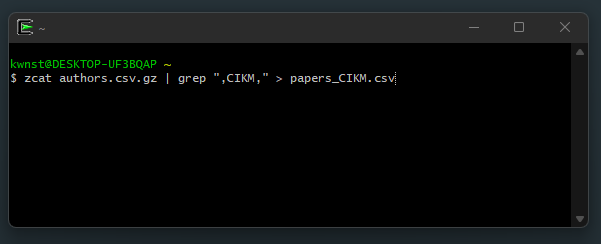

In [96]:
library("IRdisplay")
display_png(file="Screenshot 2022-07-06 174016.png")

* Packages used:

In [97]:
install.packages('igraph')
library('igraph')
library('data.table')
library('dplyr')
library('stringr')
#install.packages('splitstackshape')
library('splitstackshape')


  There is a binary version available but the source version is later:
       binary source needs_compilation
igraph  1.2.6  1.3.2              TRUE

  Binaries will be installed


Warning message:
"package 'igraph' is in use and will not be installed"


* Reading the data from the created csv files.

In [98]:
# data load
dt_cikm <- fread("cmd_cleaning/papers_CIKM.csv",
                    header = FALSE)
dt_kdd <- fread("cmd_cleaning/papers_KKD.csv",
                    header = FALSE)
dt_icwsm <- fread("cmd_cleaning/papers_ICWSM.csv",
                    header = FALSE)
dt_www <- fread("cmd_cleaning/papers_WWW.csv",
                    header = FALSE)
dt_ieee <- fread("cmd_cleaning/papers_IEEE.csv",
                    header = FALSE)
dt_ttl <- do.call("rbind", list(dt_cikm, dt_kdd, dt_icwsm, dt_www, dt_ieee))
colnames(dt_ttl) <- c("year", "paper", "conference", "authors")

# filtering data based on last 5 years
yrs <- (max(dt_ttl$year) - 5)
dt_final <- dt_ttl[dt_ttl$year > yrs,]
head(dt_final)

Warning message in fread("cmd_cleaning/papers_CIKM.csv", header = FALSE):
"Found and resolved improper quoting out-of-sample. First healed line 105: <<2011,"Examining the "leftness" property of Wikipedia categories.",CIKM,"Karl Gyllstrom,Marie-Francine Moens">>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning."
Warning message in fread("cmd_cleaning/papers_KKD.csv", header = FALSE):
"Found and resolved improper quoting out-of-sample. First healed line 711: <<2001,"The "DGX" distribution for mining massive, skewed data.",KDD,"Zhiqiang Bi,Christos Faloutsos,Flip Korn">>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning."
Warning message in fread("cmd_cleaning/papers_ICWSM.csv", header = FALSE):
"Found and resolved improper quoting in first 100 rows. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="

year,paper,conference,authors
2017,Public Transportation Mode Detection from Cellular Data.,CIKM,"Guanyao Li,Chun-Jie Chen,Sheng-Yun Huang,Ai-Jou Chou,Xiaochuan Gou,Wen-Chih Peng,Chih-Wei Yi"
2019,DSANet: Dual Self-Attention Network for Multivariate Time Series Forecasting.,CIKM,"Siteng Huang,Donglin Wang,Xuehan Wu,Ao Tang"
2020,Multi-task Adversarial Spatial-Temporal Networks for Crowd Flow Prediction.,CIKM,"Senzhang Wang,Hao Miao,Hao Chen,Zhiqiu Huang"
2020,A Framework for Analyzing the Impact of Missing Data in Predictive Models.,CIKM,"Fabiola Santore,Eduardo Cunha de Almeida,Wagner Hugo Bonat,Eduardo H. M. Pena,Luiz Eduardo S. de Oliveira"
2020,Auxiliary-task Based Deep Reinforcement Learning for Participant Selection Problem in Mobile Crowdsourcing.,CIKM,"Wei Shen 0005,Xiaonan He,Chuheng Zhang,Qiang Ni,Wanchun Dou,Yan Wang"
2016,Separating-Plane Factorization Models: Scalable Recommendation from One-Class Implicit Feedback.,CIKM,"Haolan Chen,Di Niu,Kunfeng Lai,Yu Xu,Masoud Ardakani"


* The below program takes last column of the above dataset and produce all possible combinations.
* Its running time is about 30mins so for the convenience of the reader, the output is loaded after the program. So no need to run the below cell to proceed.

In [ ]:
# loop to itterate through all combinations
authors_final <- data.frame(year = character(), author1 = character(), author2 = character())
i <- 1
while (i < nrow(dt_authors1)) {
    dt_authors1
    for (a in seq(ncol(dt_authors1))) {
        aa <- dt_authors1[i, ..a]
        if (is.na(aa)) {
            break
        }
        for (b in seq(ncol(dt_authors1))) {
            bb <- dt_authors1[i, ..b]
            if (is.na(bb)) {
                break
            }
            if (a!=b) {
                year = dt_authors1[i, "year"]
                authors_final[nrow(authors_final)+1,] <- c(year,aa,bb)
            }
        }
    }
i <- i + 1
print(i)
}


In [85]:
authors_final = read.csv("csv/authors_final.csv")
head(authors_final)

year,author1,author2
2017,Guanyao Li,Chun-Jie Chen
2017,Guanyao Li,Sheng-Yun Huang
2017,Guanyao Li,Ai-Jou Chou
2017,Guanyao Li,Xiaochuan Gou
2017,Guanyao Li,Wen-Chih Peng
2017,Guanyao Li,Chih-Wei Yi


In [86]:
# to exclude unneccassary rows from produced by loop
`%!in%` <- Negate(`%in%`)
lst <- list(2016, 2017, 2018, 2019, 2020)
authors_final1 <- filter(authors_final, author1 %!in% lst)
authors_final1 <- filter(authors_final1, author2 %!in% lst)

* The below loop creates the 5 csv files for each conference in the appropriate format.

In [87]:
# loop for creating the csv files for each year
yrs_to_filter <- list(2016, 2017, 2018, 2019, 2020)
for (y in yrs_to_filter) {
    df <- authors_final1[authors_final1$year == y, ]
    labels <- apply(df[, c("author1", "author2")], 1, sort)
    df$id <- as.numeric(factor(apply(labels, 2,
                        function(x) paste(x, collapse = ""))))
    final_df <- as.data.frame(table(df$id))
    colnames(final_df) <- c("id", "Frequency")
    final_df$id <- as.numeric(final_df$id)
    mapping <- unique(df[, c(2:4)])
    mapping$id <- as.numeric(mapping$id)
    final_df2 <- left_join(final_df, mapping, by = "id")
    final_df3 <- final_df2[!duplicated(final_df2$id), ]
    final_df3 <- final_df3[,c(3, 4, 2)]
    colnames(final_df3) <- c("from", "to", "weight")
    path <- paste("csv/authors_", y, ".csv", sep = "")
    write.csv(final_df3, path, row.names = FALSE)
}

#### 2. Average degree over time

In [88]:
# reading csv
csv16 <- read.csv('csv/authors_2016.csv')
csv17 <- read.csv('csv/authors_2017.csv')
csv18 <- read.csv('csv/authors_2018.csv')
csv19 <- read.csv('csv/authors_2019.csv')
csv20 <- read.csv('csv/authors_2020.csv')

# graphs creation
library("igraph")
g16 <- graph_from_data_frame(csv16, directed = FALSE)
g17 <- graph_from_data_frame(csv17, directed = FALSE)
g18 <- graph_from_data_frame(csv18, directed = FALSE)
g19 <- graph_from_data_frame(csv19, directed = FALSE)
g20 <- graph_from_data_frame(csv20, directed = FALSE)

# number of vertices
vrx_16 <- gorder(g16)
vrx_17 <- gorder(g17)
vrx_18 <- gorder(g18)
vrx_19 <- gorder(g19)
vrx_20 <- gorder(g20)

# number of edges
edg_16 <- gsize(g16)
edg_17 <- gsize(g17)
edg_18 <- gsize(g18)
edg_19 <- gsize(g19)
edg_20 <- gsize(g20)

# diameters of the graphs
diam16 <- diameter(g16, directed = FALSE)
diam17 <- diameter(g17, directed = FALSE)
diam18 <- diameter(g18, directed = FALSE)
diam19 <- diameter(g19, directed = FALSE)
diam20 <- diameter(g20, directed = FALSE)

# average graphs degrees
avg_dgr16 <- mean(degree(g16))
avg_dgr17 <- mean(degree(g17))
avg_dgr18 <- mean(degree(g18))
avg_dgr19 <- mean(degree(g19))
avg_dgr20 <- mean(degree(g20))

# prepare data for visualisation
viz_vertices <- cbind(vrx_16, vrx_17, vrx_18, vrx_19, vrx_20)
colnames(viz_vertices) <- c(2016, 2017, 2018, 2019, 2020)
viz_edges <- cbind(edg_16, edg_17, edg_18, edg_19, edg_20)
colnames(viz_edges) <- c(2016, 2017, 2018, 2019, 2020)
viz_diam <- cbind(diam16, diam17, diam18, diam19, diam20)
colnames(viz_diam) <- c(2016, 2017, 2018, 2019, 2020)
viz_degree <- cbind(avg_dgr16, avg_dgr17, avg_dgr18, avg_dgr19, avg_dgr20)
colnames(viz_degree) <- c(2016, 2017, 2018, 2019, 2020)

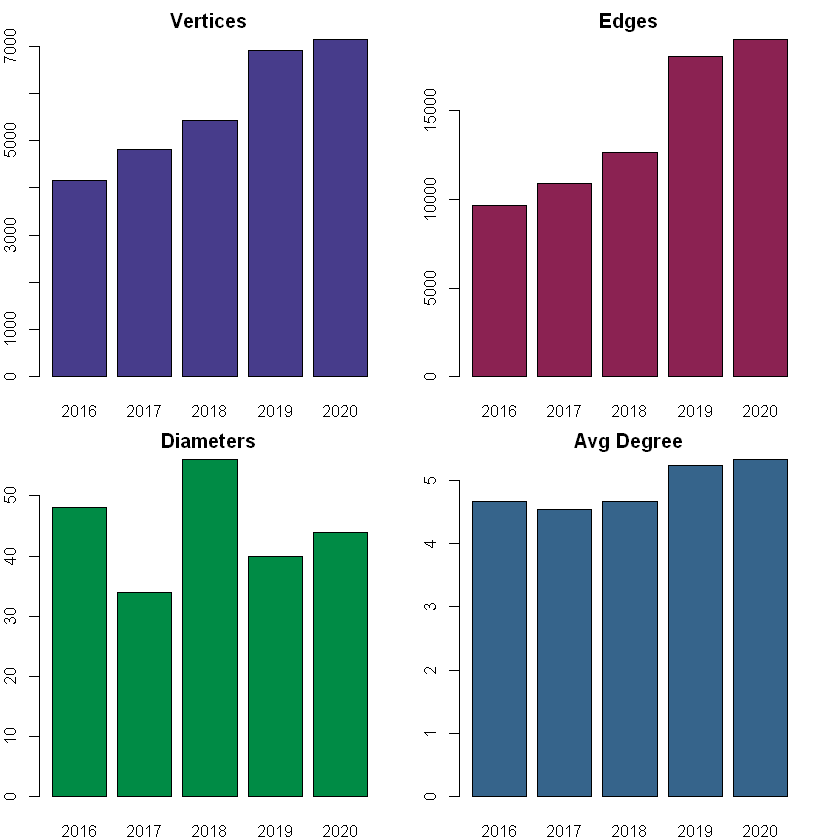

In [89]:
# visualizations
par(mfrow=c(2,2))
par(mar=c(2,2,2,2))
barplot(viz_vertices, col = 'slateblue4', main = 'Vertices')
barplot(viz_edges, col = 'violetred4', main = "Edges")
barplot(viz_diam, col = 'springgreen4', main = "Diameters")
barplot(viz_degree, col = 'steelblue4', main = "Avg Degree")

#### 3. Important nodes

In [90]:
# --- DEGREE ---

dgr16 <- degree(g16)
dgr17 <- degree(g17)
dgr18 <- degree(g18)
dgr19 <- degree(g19)
dgr20 <- degree(g20)

dgr16_top10 <- head(sort(dgr16, decreasing = TRUE), 10)
dgr17_top10 <- head(sort(dgr17, decreasing = TRUE), 10)
dgr18_top10 <- head(sort(dgr18, decreasing = TRUE), 10)
dgr19_top10 <- head(sort(dgr19, decreasing = TRUE), 10)
dgr20_top10 <- head(sort(dgr20, decreasing = TRUE), 10)

# --- PAGE RANK ---

pgr16 = page_rank(g16, algo = 'arpack')
pgr17 = page_rank(g17, algo = 'arpack')
pgr18 = page_rank(g18, algo = 'arpack')
pgr19 = page_rank(g19, algo = 'arpack')
pgr20 = page_rank(g20, algo = 'arpack')

pgr16_top10 = head(sort(pgr16$vector, decreasing = TRUE), 10)
pgr17_top10 = head(sort(pgr17$vector, decreasing = TRUE), 10)
pgr18_top10 = head(sort(pgr18$vector, decreasing = TRUE), 10)
pgr19_top10 = head(sort(pgr19$vector, decreasing = TRUE), 10)
pgr20_top10 = head(sort(pgr20$vector, decreasing = TRUE), 10)

* Importance based on degree.

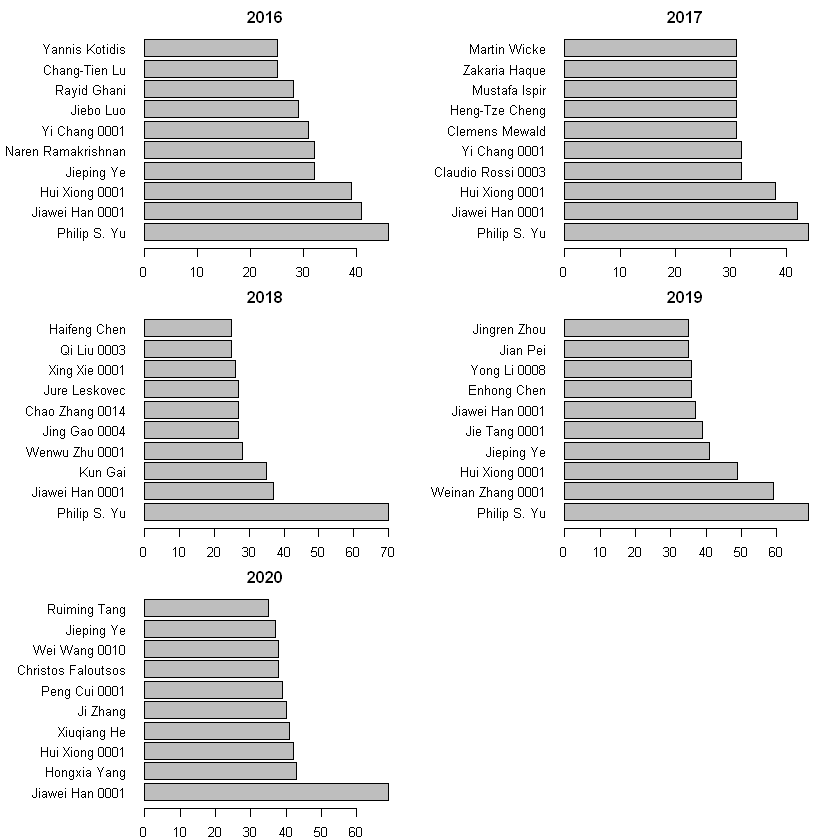

In [91]:
# degree
par(mfrow=c(3,2))
par(mar=c(2,9,2,2))
barplot(dgr16_top10, horiz = T, las = 1, main = "2016")
barplot(dgr17_top10, horiz = T, las = 1, main = "2017")
barplot(dgr18_top10, horiz = T, las = 1, main = "2018")
barplot(dgr19_top10, horiz = T, las = 1, main = "2019")
barplot(dgr20_top10, horiz = T, las = 1, main = "2020")

* Importance based on PageRank.

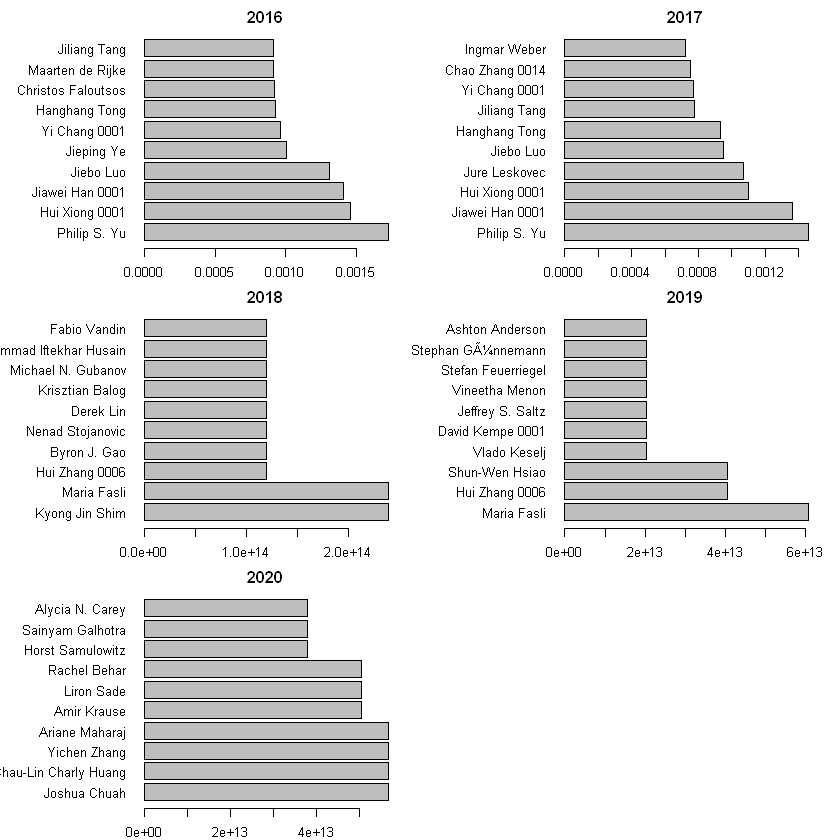

In [92]:
# pagerank
par(mfrow=c(3,2))
par(mar=c(2,9,2,2))
barplot(pgr16_top10, horiz = T, las = 1, main = "2016")
barplot(pgr17_top10, horiz = T, las = 1, main = "2017")
barplot(pgr18_top10, horiz = T, las = 1, main = "2018")
barplot(pgr19_top10, horiz = T, las = 1, main = "2019")
barplot(pgr20_top10, horiz = T, las = 1, main = "2020")

#### 4. Communities

* Fast greedy clustering, infomap clustering, and louvain clustering on the 5 undirected co-authorship graphs.

In [93]:
com_fast_greedy16 <- cluster_fast_greedy(g16) 
com_infomap16 <- cluster_infomap(g16) 
com_louvain16 <- cluster_louvain(g16) 

com_fast_greedy17 <- cluster_fast_greedy(g17)
com_infomap17 <- cluster_infomap(g17)
com_louvain17 <- cluster_louvain(g17) 

com_fast_greedy18 <- cluster_fast_greedy(g18) 
com_infomap18 <- cluster_infomap(g18) 
com_louvain18 <- cluster_louvain(g18) 

com_fast_greedy19 <- cluster_fast_greedy(g19) 
com_infomap19 <- cluster_infomap(g19) 
com_louvain19 <- cluster_louvain(g19) 

com_fast_greedy20 <- cluster_fast_greedy(g20) 
com_infomap20 <- cluster_infomap(g20) 
com_louvain20 <- cluster_louvain(g20)

* Detect the evolution of the communities this user belongs to.

In [94]:
v1 = membership(com_fast_greedy16)['Philip S. Yu']
v2 = membership(com_fast_greedy17)['Philip S. Yu']
v3 = membership(com_fast_greedy18)['Philip S. Yu']
v4 = membership(com_fast_greedy19)['Philip S. Yu']
v5 = membership(com_fast_greedy20)['Philip S. Yu']

int1 = intersect(com_fast_greedy16[v1]$'4', com_fast_greedy17[v2]$'4')
int2 = intersect(com_fast_greedy16[v1]$'4', com_fast_greedy18[v3]$'4')
int3 = intersect(com_fast_greedy16[v1]$'4', com_fast_greedy19[v4]$'1')
int4 = intersect(com_fast_greedy16[v1]$'4', com_fast_greedy20[v5]$'202')

intersect(int1, int2)
intersect(int1, int3)
intersect(int1, int4)

[1] "Bokai Cao"         "Xiaokai Wei"       "Chenwei Zhang"    
 [4] "Chun-Ta Lu"        "Lifang He 0001"    "Sihong Xie"       
 [7] "Weixiang Shao"     "Jiawei Zhang 0001" "Nan Du"           
[10] "Philip S. Yu"

[1] "Xiaokai Wei"       "Chun-Ta Lu"        "Jiawei Zhang 0001"
[4] "Hu Xu"             "Lei Shu 0004"      "Philip S. Yu"

[1] "Lifang He 0001" "Sihong Xie"     "Philip S. Yu"

* Visualization

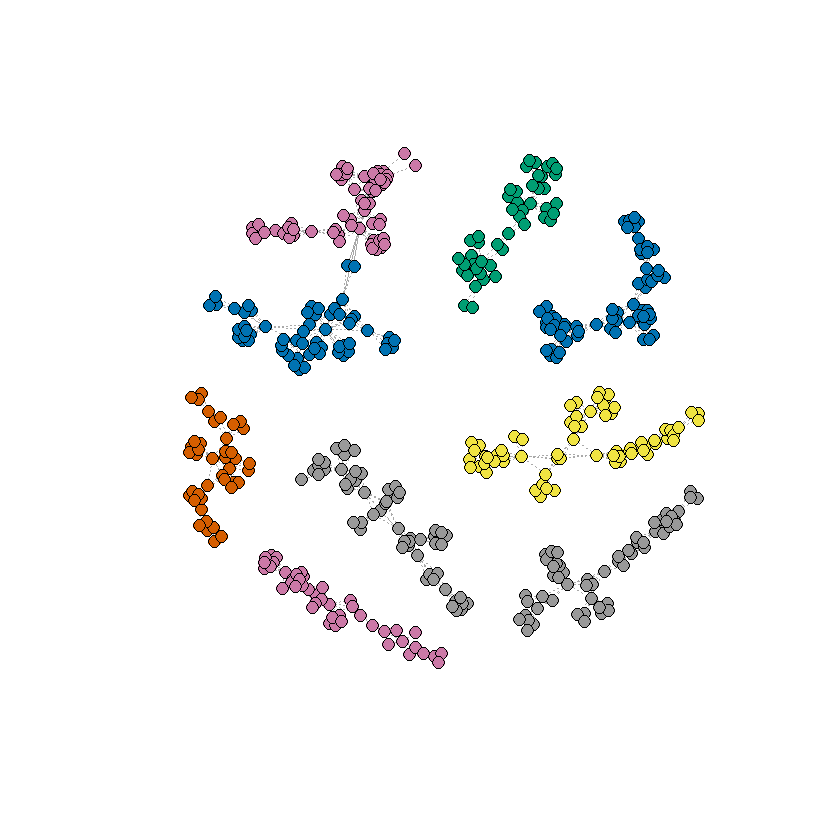

In [95]:
V(g20)$color <- factor(membership(com_louvain20)) 
cross <- crossing(g20, communities = com_louvain20)
E(g20)$lty <- ifelse(cross, "solid", "dotted") 
comm_size <- sizes(com_louvain20)
mid_comm <- unlist(com_louvain20[comm_size > 40 & comm_size < 80]) 
subgr <- induced.subgraph(g20, mid_comm) 
plot(subgr, vertex.label = NA, edge.arrow.width = 0.9, 
     edge.arrow.size = 0.4, coords = layout_with_fr(subgr), 
     margin = 0.1, vertex.size = 5)